In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Link to the data set is the kaggle link as follows:


https://www.kaggle.com/kartik2112/fraud-detection

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [203]:
print(df_train.shape,df_test.shape)

(1296675, 23) (555719, 23)


## EDA

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

We see that no null values are present.

In [5]:
df_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [26]:
df_train.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


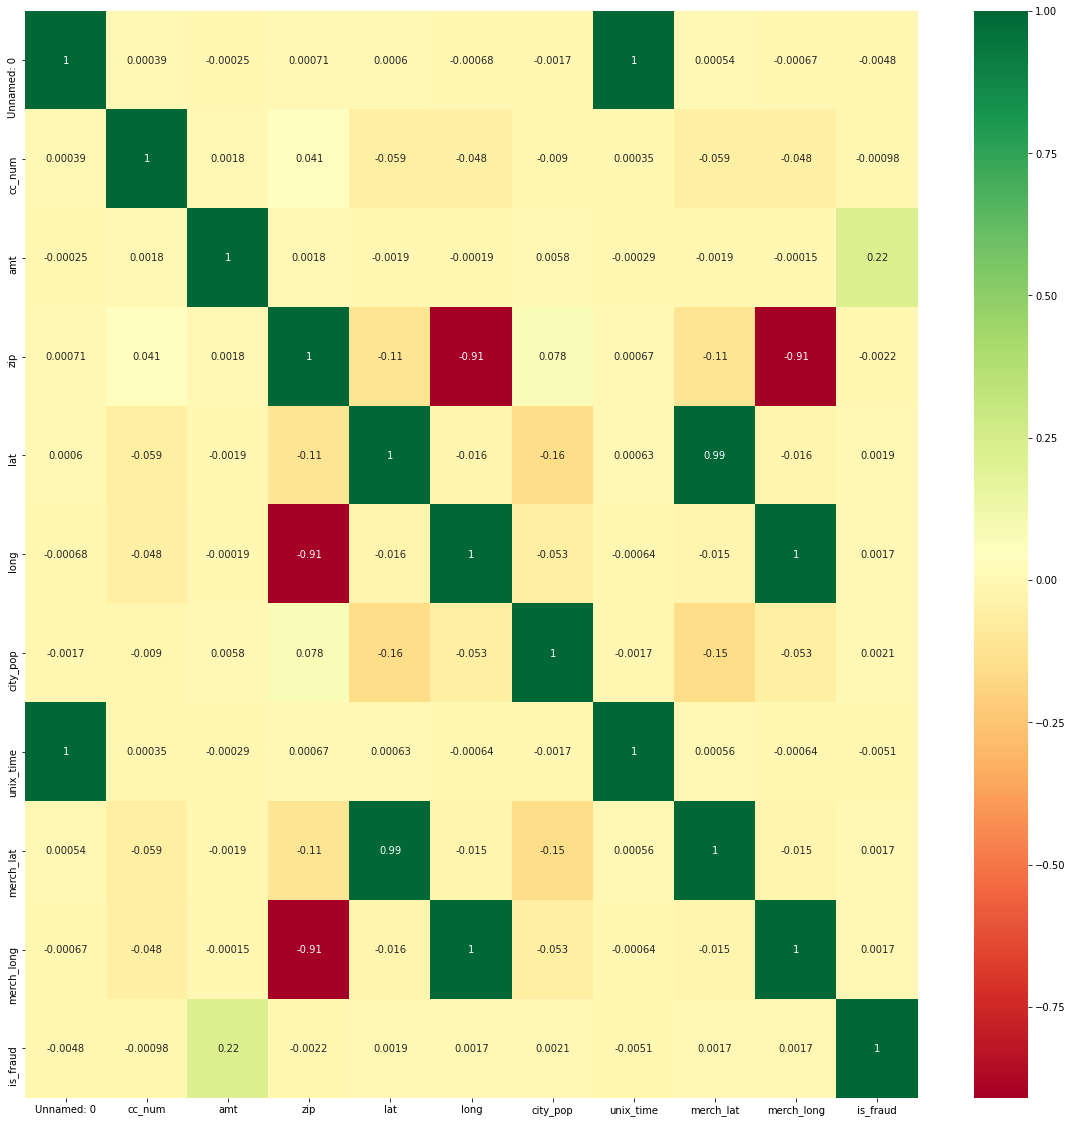

In [33]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset

corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0, 0.5, 'Frequency')

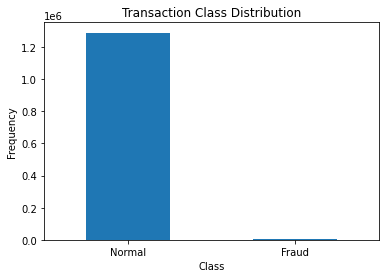

In [6]:
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

We see that data is imbalanced 

In [204]:

## Get the Fraud and the normal dataset 

fraud = df_train[df_train['is_fraud']==1]

normal = df_train[df_train['is_fraud']==0]

In [205]:
print(fraud.shape,normal.shape)

(7506, 23) (1289169, 23)


In [9]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [10]:
normal.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

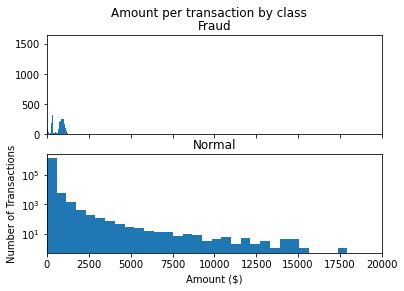

In [11]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [12]:
fraud['t_time'] = fraud.trans_date_trans_time.str[11:]
normal['t_time'] = normal.trans_date_trans_time.str[11:]

/Users/sapnasharma/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sapnasharma/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


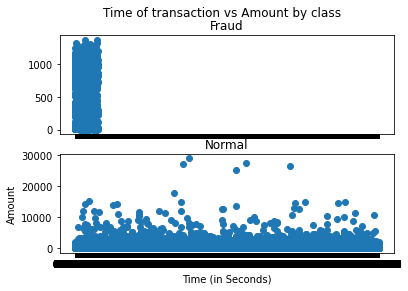

In [13]:
# We Will check is fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.t_time, fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(normal.t_time, normal.amt)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

(array([171., 164., 166., 171., 171., 165., 167., 153., 169., 159., 159.,
        165., 159., 167., 151., 155., 167., 153., 151., 162., 154., 151.,
        157., 153., 146., 151., 142., 143., 147., 146., 145., 145., 143.,
        149., 142., 146., 139., 140., 142., 138., 139., 136., 134., 136.,
        135., 135., 134., 133., 130., 130.]),
 array([   0. ,  129.3,  258.6,  387.9,  517.2,  646.5,  775.8,  905.1,
        1034.4, 1163.7, 1293. , 1422.3, 1551.6, 1680.9, 1810.2, 1939.5,
        2068.8, 2198.1, 2327.4, 2456.7, 2586. , 2715.3, 2844.6, 2973.9,
        3103.2, 3232.5, 3361.8, 3491.1, 3620.4, 3749.7, 3879. , 4008.3,
        4137.6, 4266.9, 4396.2, 4525.5, 4654.8, 4784.1, 4913.4, 5042.7,
        5172. , 5301.3, 5430.6, 5559.9, 5689.2, 5818.5, 5947.8, 6077.1,
        6206.4, 6335.7, 6465. ]),
 <BarContainer object of 50 artists>)

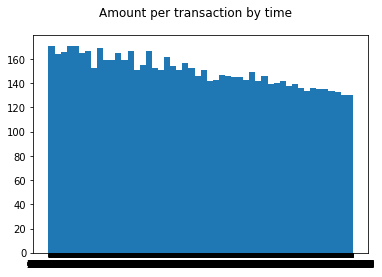

In [16]:
f, (ax1) = plt.subplots(1, 1, sharex=True)
f.suptitle('Amount per transaction by time')
bins = 50
ax1.hist(fraud.t_time, bins = bins)



#fraud.hist(column = 't_time')

## 2) Preparing the data for use in different models

## Observations and comments
### Columns to drop
The first column contains just the indices and is not useful so we will drop it.   
The third column with customer card number is also not useful , so we will drop it. 
first name and last name can also be dropped.  
Transaction number - is it really needed? can be dropped.


### Feature Engineering
We can calculate the age from the DOB column.  
We can separate the date and time if need be.

how do we use the unix_time?


In [44]:
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res
new = dropCol(df_train)

In [45]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   street      1296675 non-null  object 
 5   city        1296675 non-null  object 
 6   state       1296675 non-null  object 
 7   zip         1296675 non-null  int64  
 8   lat         1296675 non-null  float64
 9   long        1296675 non-null  float64
 10  city_pop    1296675 non-null  int64  
 11  job         1296675 non-null  object 
 12  dob         1296675 non-null  object 
 13  unix_time   1296675 non-null  int64  
 14  merch_lat   1296675 non-null  float64
 15  merch_long  1296675 non-null  float64
 16  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 168.2+ MB


In [206]:
## Take some sample of the data

train_sample= df_train.sample(frac = 0.1,random_state=1)

train_sample.shape


(129668, 23)

In [207]:
# sampling to run the model faster
fraud_sample = train_sample[train_sample['is_fraud']==1]
valid_sample = train_sample[train_sample['is_fraud']==0]

fraud_org = df_train[df_train['is_fraud']==1]
valid_org = df_train[df_train['is_fraud']==0]
# sanity check
outlier_fraction = len(fraud_org)/float(len(valid_org))
outlier_fraction_sample = len(fraud_sample)/float(len(valid_sample))

print("Outlier fraction original:{} \nOutlier fraction Sample  :{}".format(outlier_fraction,outlier_fraction_sample))
#print("Fraud Cases Sample : {}".format(len(fraud_sample)))
#print("Valid Cases Sample : {}".format(len(valid_sample)))

Outlier fraction original:0.005822355331224998 
Outlier fraction Sample  :0.005466684242767306


### We will be doing operations on train_sample

In [208]:
# dropping the columns
# dropping the columns ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
# complete data set
train_sample = dropCol(train_sample)
# fraud
fraud_sample = dropCol(fraud_sample)
#valid
valid_sample = dropCol(valid_sample)
# for test data
X_test = dropCol(df_test)
print ( train_sample.shape, fraud_sample.shape, valid_sample.shape,X_test.shape)

(129668, 17) (705, 17) (128963, 17) (555719, 17)


In [224]:

#Create independent and Dependent Features
columns = train_sample.columns.tolist()
# removing the dependent feature is_fraud

columns = [c for c in columns if c not in ["is_fraud"]]


X_train = train_sample[columns]

Y_train = train_sample['is_fraud']

X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (555719, 16) (555719,)


In [1]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

### Converting dob to age

In [225]:
import numpy as np
import datetime
from datetime import date
def age_years(born):
    return 2019 - int(born[0:4])

X_train['age'] = X_train['dob'].apply(lambda x: age_years(x))
X_train = X_train.drop(['dob'],axis =1)

X_test['age'] = X_test['dob'].apply(lambda x: age_years(x))
X_test = X_test.drop(['dob'],axis =1)
print(X_train.shape,X_test.shape)


(129668, 16) (555719, 16)


/Users/sapnasharma/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [227]:
# concanating the test and train data so that number of columns remain the same in both the data sets
final_df=pd.concat([X_train,X_test],axis=0)
final_df.shape


(685387, 16)

In [228]:
categorical_features =[feature for feature in X_train.columns if X[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [229]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(X[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 951
Distinct categories for city  are 867
Distinct categories for state  are 51
Distinct categories for job  are 486


In [230]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [231]:

final_df=category_onehot_multcols(categorical_features)


merchant
category
gender
street
city
state
job


In [232]:

# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [233]:
final_df.shape


(685387, 3097)

In [234]:
# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]

In [235]:
print(df_Train.shape,df_Test.shape)

(129668, 3097) (555719, 3097)


In [155]:

from sklearn.linear_model import LogisticRegression

In [237]:
model_LR = LogisticRegression()
model_LR.fit(df_Train,Y_train)

LogisticRegression()

In [238]:
y_predict = model_LR.predict(df_Test)

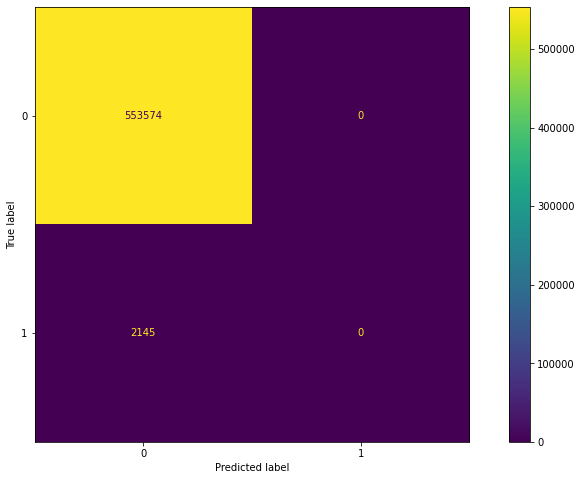

In [268]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_LR,df_Test, Y_test)

In [265]:
print(y_predict.sum(),Y_test.sum())

0 2145


## Observation 
We see that the model has not predicted any fraud cases, while there were 2145 fraud cases.
Clearly shows how poorly the Logistic regression model performed as we have not handled the imabalance in the dataset
We proceed to handle the imbalance in data set.